# Task 1

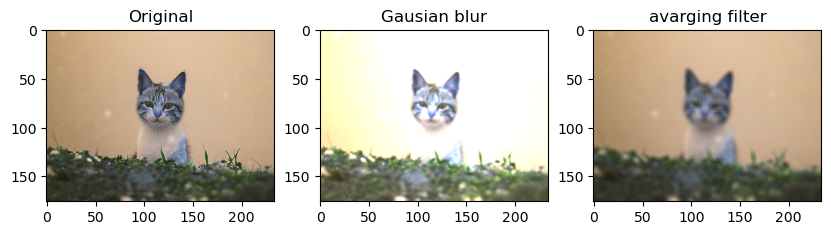

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread(r"C:\Users\Fujitsu T\Desktop\journal 8\image.jpeg")
img = cv2.resize(img, (0, 0), None, .25, .25)

#gausian filer
gaussianBlurKernel = np.array(([[1, 2, 1], [2, 4, 2], [1, 2, 1]]), np.float32)/9
gaussianBlur = cv2.filter2D(src=img, kernel=gaussianBlurKernel, ddepth=-1)
#averaging filter
kernel = np.ones((5,5),np.float32)/25
dst = cv2.filter2D(img,-1,kernel)

plt.figure(figsize=(10,10))
plt.subplot(1,3,1),plt.imshow(img),plt.title('Original')
plt.subplot(1,3,2),plt.imshow(gaussianBlur),plt.title('Gausian blur')
plt.subplot(1,3,3),plt.imshow(dst),plt.title('avarging filter')
plt.show()


# Task 2

## rank filter is also known as median filter
## rank=1 will increase the noise as it will emphasize low intensity values
## rank=25 will decrease the noise as it will emphasize high intensity values

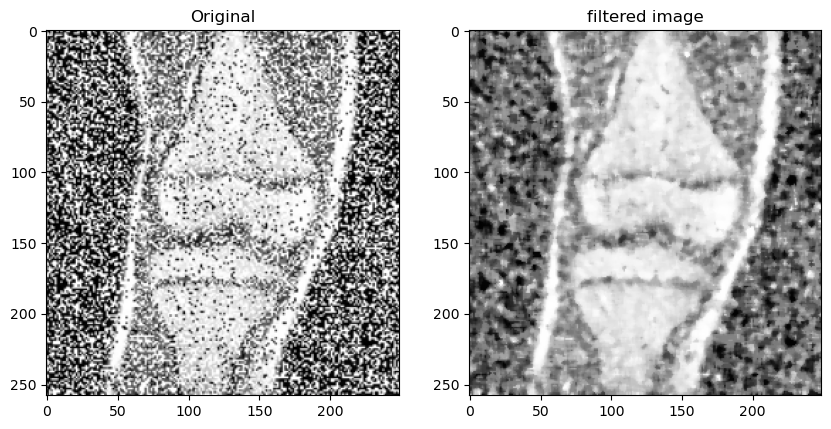

In [11]:
img2 = cv2.imread(r"C:\Users\Fujitsu T\Desktop\journal 8\noiseImg.png")
n=5
output_image = cv2.medianBlur(img2, n)

plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1),plt.imshow(img2),plt.title('Original')
plt.subplot(1,2,2),plt.imshow(output_image),plt.title('filtered image')
plt.show()

# Task 3

In [28]:
img3 = cv2.imread(r"C:\Users\Fujitsu T\Desktop\journal 8\moon.png")

def mylaplacian(image):
    h, w = image.shape
    
    vertical_edges = np.zeros_like(image, dtype=np.float32)
    horizontal_edges = np.zeros_like(image, dtype=np.float32)
    combined_edges = np.zeros_like(image, dtype=np.float32)
    
    for x in range(1, h - 1):  
        for y in range(1, w - 1):
            # Vertical edges
            vertical_edges[x, y] = image[x + 1, y] + image[x - 1, y] - 2 * image[x, y]
            # Horizontal edges
            horizontal_edges[x, y] = image[x, y + 1] + image[x, y - 1] - 2 * image[x, y]
            # Combine edges
            combined_edges[x, y] = vertical_edges[x, y] + horizontal_edges[x, y]
    
    vertical_edges = cv2.normalize(vertical_edges, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
    horizontal_edges = cv2.normalize(horizontal_edges, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
    combined_edges = cv2.normalize(combined_edges, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
    
    return vertical_edges, horizontal_edges, combined_edges

vertical, horizontal, combined = mylaplacian(img)

plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.subplot(2, 3, 2)
plt.imshow(vertical, cmap='gray')
plt.title('Laplacian - Vertical Edges')

plt.subplot(2, 3, 3)
plt.imshow(horizontal, cmap='gray')
plt.title('Laplacian - Horizontal Edges')

plt.subplot(2, 3, 4)
plt.imshow(combined, cmap='gray')
plt.title('Laplacian - Combined Edges')

ValueError: too many values to unpack (expected 2)